# Introduction

**Write some background info on sP waves**

## Data preparation

Write about how I prepared and collected the data

# Exploratory Data Analysis

## Loading data

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import pickle

In [2]:
def retrieveVariables(filename):
    variables = []
    with open(str(filename), 'rb') as file:
        variables = pickle.load(file)
    return variables

wdir = "./"

# read in data
[envelop_signal, sPmP_time, sPmP_label, 
 dist, evdp, mag, stlo, 
 stla, evlo, evla, evid, 
 fname] = retrieveVariables(f"{wdir}/data/c_readindata")


In [4]:
df = pd.DataFrame()
arr_list = [row for row in envelop_signal]
df["envelope_signal"] = arr_list
df["sPmP_time"] = sPmP_time
df["sPmP_label"] = sPmP_label
df["dist"] = dist
df["evdp"] = evdp
df["mag"] = mag
df["stlo"] = stlo
df["stla"] = stla
df["evlo"] = evlo
df["evla"] = evla
df["evid"] = evid
df["fname"] = fname
df = df.iloc[:-1818]
df

envelope_signal  sPmP_time  sPmP_label  \
0    [1.4300437e-07, 7.03409e-08, 7.8110894e-08, 5....   5.072475           1   
1    [4.2672582e-07, 1.09194275e-07, 1.3851862e-07,...   3.601901           1   
2    [1.5545314e-08, 1.6448691e-08, 1.1169714e-08, ...   3.576212           1   
3    [1.2666386e-07, 2.1184671e-07, 1.4236237e-07, ...   9.662176           1   
4    [7.6519356e-08, 2.3339777e-07, 1.5352204e-07, ...   4.871820           1   
..                                                 ...        ...         ...   
298  [1.3637839e-08, 1.11398215e-08, 7.990573e-09, ...   1.660942           0   
299  [1.8110338e-08, 1.2053798e-08, 9.76191e-09, 1....   1.754915           0   
300  [1.6754226e-08, 1.4606997e-08, 1.3105877e-08, ...   0.220163           0   
301  [1.6297679e-07, 1.5564483e-07, 1.455569e-07, 1...   0.437944           0   
302  [3.8166e-09, 3.9347303e-09, 4.049084e-09, 4.16...   7.536399           0   

           dist   evdp   mag        stlo       stla        evlo       evla  \
0     74.032509   8.44  2.19 -118.016487  35.152519 -117.487999  35.660500   
1     96.090866  11.85  2.42 -115.304359  33.238541 -115.217827  32.375172   
2     82.756546   8.44  2.19 -117.696289  34.934391 -117.487999  35.660500   
3     46.518520   7.29  2.54 -118.420792  35.291302 -118.732826  34.959499   
4     81.210190  15.88  2.75 -116.028801  32.553501 -115.182671  32.405499   
..          ...    ...   ...         ...        ...         ...        ...   
298  228.047348   1.74  3.03 -118.598999  34.083771 -117.779167  36.025669   
299  232.260025   1.74  3.03 -116.940323  34.049049 -117.779167  36.025669   
300  158.060104   1.74  3.03 -118.425728  34.703121 -117.779167  36.025669   
301  169.723495   1.74  3.03 -118.453751  34.599300 -117.779167  36.025669   
302   21.023142   1.74  3.03 -117.668503  36.192501 -117.779167  36.025669   

         evid                        fname  
0    39913943     20220116124930000.CI.CCA  
1    39929439     20220201012424220.CI.SLV  
2    39913943    20220116124930000.CI.LMR2  
3    39913455     20220115161902000.CI.TEH  
4    39913895     20220116091814410.BC.RMX  
..        ...                          ...  
298  39923623    20220126095905010.NP.5081  
299  39923623    20220126095905010.NP.5442  
300  39923623    20220126095905010.NP.5480  
301  39923623  20220126095905010.NP.548110  
302  39923623    20220126095905010.PB.B916  

[303 rows x 12 columns]

## Variables in that data

`envelop_signal` 

`sPmP_time`
`sPmP_label`
`dist`
`evdp`
`mag`
`stlo`
`stla`
`evlo`
`evla`
`evid`
`fname`

# Tidying data

In [141]:
env_list = []
for i in range(1, 1302):
    env_list.append("env" + str(i))

In [143]:
df = pd.DataFrame(data=[envelop_signal], columns=env_list)

ValueError: Must pass 2-d input. shape=(1, 2121, 1301)

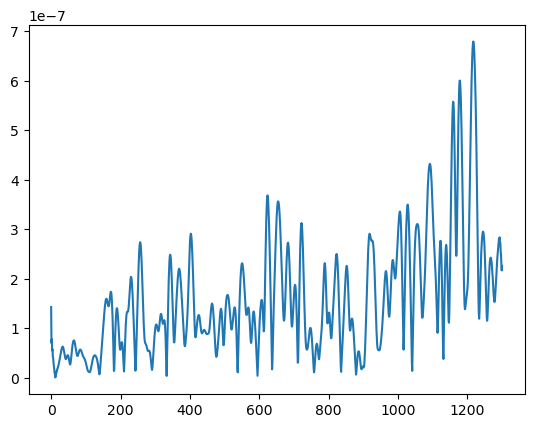

In [6]:
plt.plot(envelop_signal[0])

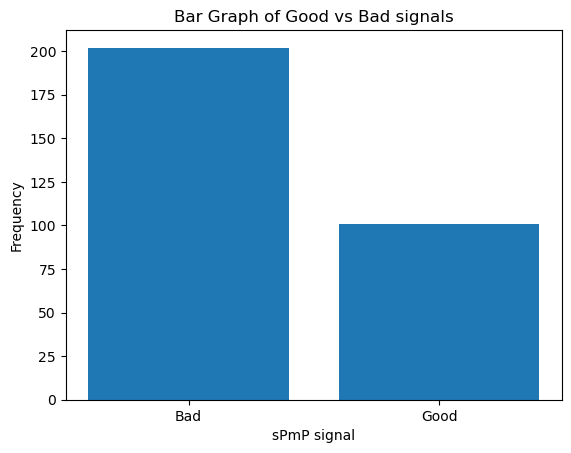

In [8]:
fig, ax = plt.subplots()
sPmP_label = df["sPmP_label"]
num_zeros = sPmP_label.size - np.count_nonzero(sPmP_label)
ax.bar([0, 1], [num_zeros, np.count_nonzero(sPmP_label)])

# Set the x-axis ticks and tick labels
ax.set_xticks([0, 1])
ax.set_xticklabels(['Bad', 'Good'])

# set the x-axis label and y-axis label
plt.xlabel('sPmP signal')
plt.ylabel('Frequency')

# set the title of the plot
plt.title('Bar Graph of Good vs Bad signals')


# display the plot
plt.show()

## Correlation plot

In [9]:
import seaborn as sns

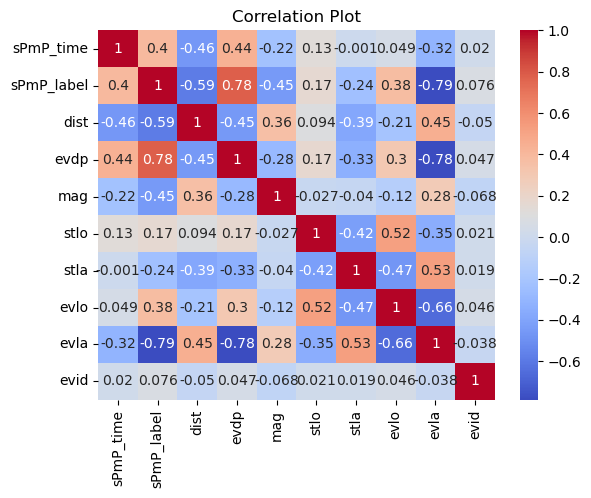

In [10]:
numeric_cols = df.select_dtypes(include=['int', 'float']).columns.tolist()

# create a correlation matrix
corr_matrix = df[numeric_cols].corr()

# create a heatmap of the correlation matrix using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# set the title of the plot
plt.title('Correlation Plot')

# display the plot
plt.show()

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit

In [12]:
# Specify the column to use for stratified sampling (assuming it's called 'target')
stratify_col = 'sPmP_label'

# Initialize the StratifiedShuffleSplit object
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Use the object to split the data into training and testing sets
for train_idx, test_idx in strat_split.split(df, df[stratify_col]):
    df_train = df.iloc[train_idx].reset_index(drop=True, inplace= False)
    df_test = df.iloc[test_idx].reset_index(drop=True, inplace= False)

print(df_train.shape)
print(df_test.shape)

(242, 12)
(61, 12)


In [13]:
np.count_nonzero(df_train["sPmP_label"].values)

81

In [16]:
from dtw import dtw

In [17]:
x = envelop_signal[0]
y = envelop_signal[1]

d = dtw(x, y)
d.distance

8.940416890790281e-05

# Data split

In [72]:
evs_train = df_train["envelope_signal"]
evs_train = np.vstack(evs_train.values).astype(float)

labels_train = df_train["sPmP_label"].values


evs_test = df_test["envelope_signal"]
evs_test = np.vstack(evs_test.values).astype(float)

labels_test = df_test["sPmP_label"].values

# K fold

In [97]:
from sklearn.model_selection import KFold

In [98]:
k_folds = 5
kf = KFold(n_splits=k_folds)

# KNN model

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
def custom_dtw(x,y):
    return dtw(x,y).distance

def KNN_classifier1(k, input_ev):
    distances = []
    for index, ev in enumerate(evs_train):
        ds = custom_dtw(input_ev, ev)
        distances.append([ds,index])
    distances = sorted(distances)
    k_nearest_neighbors = [distances[i][1] for i in range(k)]
    labels = [labels_train[i] for i in k_nearest_neighbors]
    return int(max(set(labels), key=labels.count))

In [89]:
clf_knn= KNeighborsClassifier(n_neighbors=3)
clf_knn.fit(evs_train, labels_train)

KNeighborsClassifier(n_neighbors=3)

In [90]:
clf_knn_dtw = KNeighborsClassifier(n_neighbors=3, metric = custom_dtw)
clf_knn_dtw.fit(evs_train, labels_train)


KNeighborsClassifier(metric=<function custom_dtw at 0x7f35e42fadc0>,
                     n_neighbors=3)

In [93]:
from sklearn.metrics import roc_auc_score, auc, roc_curve

In [91]:
import time

# Record the start time
start_time = time.time()

# Your code block goes here
result = clf_knn.predict([evs_test[0], evs_test[1]])

# Record the end time
end_time = time.time()

# Calculate the running time
running_time = end_time - start_time

# Print the running time
print('Running time: {} seconds'.format(running_time))


Running time: 0.05875110626220703 seconds


In [92]:
y_pred_proba = clf_knn.predict_proba(evs_test)[:, 1]

# Calculate the ROC AUC
roc_auc = roc_auc_score(labels_test, y_pred_proba)
print('ROC AUC:', roc_auc)

ROC AUC: 0.7451219512195122


# ROC curve

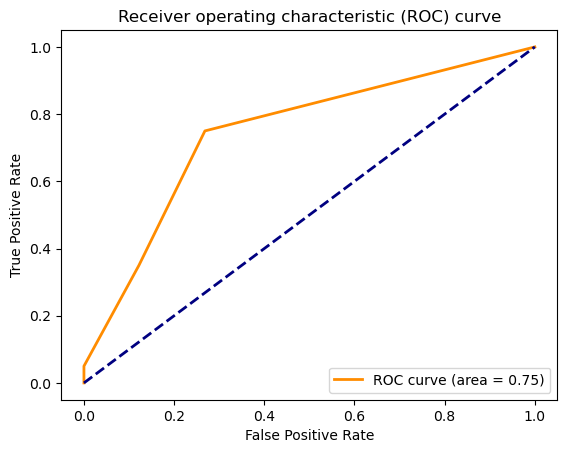

In [94]:

# Calculate the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(labels_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()


In [95]:
from sklearn.metrics import confusion_matrix

# Confusion matrix

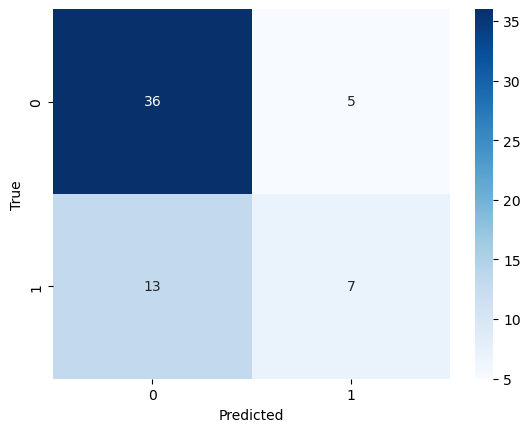

In [96]:
labels_pred = clf_knn.predict(evs_test)
# Compute confusion matrix
cm = confusion_matrix(labels_test, labels_pred)

# Plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [109]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier

# Load data and define labels
X = np.vstack((evs_train, evs_test))
y = np.append(labels_train, labels_test)

# Set up KNN model with k=3
model = KNeighborsClassifier(n_neighbors=3)

# Define number of folds for cross-validation
k_folds = 5

# Set up k-fold cross-validation
kf = KFold(n_splits=k_folds)

# Iterate over folds
for fold_idx, (train_idx, test_idx) in enumerate(kf.split(X)):
    # Split data into training and test sets
    X_train, y_train = [X[i] for i in train_idx], [y[i] for i in train_idx]
    X_test, y_test = [X[i] for i in test_idx], [y[i] for i in test_idx]
    
    # Fit KNN model to training data
    model.fit(X_train, y_train)
    
    # Predict labels for test data
    y_pred = model.predict(X_test)
    
    # Compute and print accuracy score
    accuracy = model.score(X_test, y_test)
    print(f'Fold {fold_idx+1}: Accuracy = {accuracy:.2f}')


Fold 1: Accuracy = 0.75
Fold 2: Accuracy = 0.64
Fold 3: Accuracy = 0.74
Fold 4: Accuracy = 0.68
Fold 5: Accuracy = 0.72


# cross validation with hyperparameter tuning

 best score is average cross validation accuracy

In [115]:


# Define hyperparameter space
param_grid = {'n_neighbors': range(1, 31)}

# Set up grid search with cross-validation
grid_search = GridSearchCV(clf_knn, param_grid, cv=5)

# Fit grid search to data
grid_search.fit(X, y)

# Print best hyperparameters and corresponding score
print(f'Best hyperparameters: {grid_search.best_params_}')
print(f'Best score: {grid_search.best_score_:.2f}')


Best hyperparameters: {'n_neighbors': 14}
Best score: 0.74


# LDA/QDA model

In [117]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


# Set up LDA model
lda = LinearDiscriminantAnalysis()

X = np.vstack((evs_train, evs_test))
y = np.append(labels_train, labels_test)

# Set up KNN model with k=3


# Define number of folds for cross-validation
k_folds = 5

# Set up k-fold cross-validation
kf = KFold(n_splits=k_folds)

# Iterate over folds
for fold_idx, (train_idx, test_idx) in enumerate(kf.split(X)):
    # Split data into training and test sets
    X_train, y_train = [X[i] for i in train_idx], [y[i] for i in train_idx]
    X_test, y_test = [X[i] for i in test_idx], [y[i] for i in test_idx]
    
    # Fit KNN model to training data
    lda.fit(X_train, y_train)
    
    # Predict labels for test data
    y_pred = lda.predict(X_test)
    
    # Compute and print accuracy score
    accuracy = model.score(X_test, y_test)
    print(f'Fold {fold_idx+1}: Accuracy = {accuracy:.2f}')


Fold 1: Accuracy = 0.89
Fold 2: Accuracy = 0.74
Fold 3: Accuracy = 0.85
Fold 4: Accuracy = 0.88
Fold 5: Accuracy = 0.72


In [121]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [122]:
qda = QuadraticDiscriminantAnalysis()

X = np.vstack((evs_train, evs_test))
y = np.append(labels_train, labels_test)

# Set up KNN model with k=3


# Define number of folds for cross-validation
k_folds = 5

# Set up k-fold cross-validation
kf = KFold(n_splits=k_folds)

# Iterate over folds
for fold_idx, (train_idx, test_idx) in enumerate(kf.split(X)):
    # Split data into training and test sets
    X_train, y_train = [X[i] for i in train_idx], [y[i] for i in train_idx]
    X_test, y_test = [X[i] for i in test_idx], [y[i] for i in test_idx]
    
    # Fit KNN model to training data
    qda.fit(X_train, y_train)
    
    # Predict labels for test data
    y_pred = qda.predict(X_test)
    
    # Compute and print accuracy score
    accuracy = model.score(X_test, y_test)
    print(f'Fold {fold_idx+1}: Accuracy = {accuracy:.2f}')


/home/youzhi/miniconda3/envs/PmPNet/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Fold 1: Accuracy = 0.89


/home/youzhi/miniconda3/envs/PmPNet/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Fold 2: Accuracy = 0.74


/home/youzhi/miniconda3/envs/PmPNet/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Fold 3: Accuracy = 0.85


/home/youzhi/miniconda3/envs/PmPNet/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Fold 4: Accuracy = 0.88
Fold 5: Accuracy = 0.72


/home/youzhi/miniconda3/envs/PmPNet/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [123]:
lda_param_grid = {'solver': ['svd', 'lsqr', 'eigen']}
qda_param_grid = {'reg_param': [0.0, 0.1, 0.2, 0.3]}

# Use k-fold cross-validation to find best LDA fit
lda_cv = GridSearchCV(lda, lda_param_grid, cv=5)
lda_cv.fit(X, y)

# Use k-fold cross-validation to find best QDA fit
qda_cv = GridSearchCV(qda, qda_param_grid, cv=5)
qda_cv.fit(X, y)

# Print best parameters and scores for both models
print('Best parameters for LDA:', lda_cv.best_params_)
print('Best score for LDA:', lda_cv.best_score_)
print('Best parameters for QDA:', qda_cv.best_params_)
print('Best score for QDA:', qda_cv.best_score_)

/home/youzhi/miniconda3/envs/PmPNet/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/home/youzhi/miniconda3/envs/PmPNet/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/youzhi/miniconda3/envs/PmPNet/lib/python3.8/site-packages/sklearn/discriminant_analysis.py", line 631, in fit
    self._solve_eigen(
  File "/home/youzhi/miniconda3/envs/PmPNet/lib/python3.8/site-packages/sklearn/discriminant_analysis.py", line 463, in _so

Best parameters for LDA: {'solver': 'svd'}
Best score for LDA: 0.5644808743169399
Best parameters for QDA: {'reg_param': 0.0}
Best score for QDA: 0.6897267759562842


/home/youzhi/miniconda3/envs/PmPNet/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [129]:
from sklearn.metrics import RocCurveDisplay

/home/youzhi/miniconda3/envs/PmPNet/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


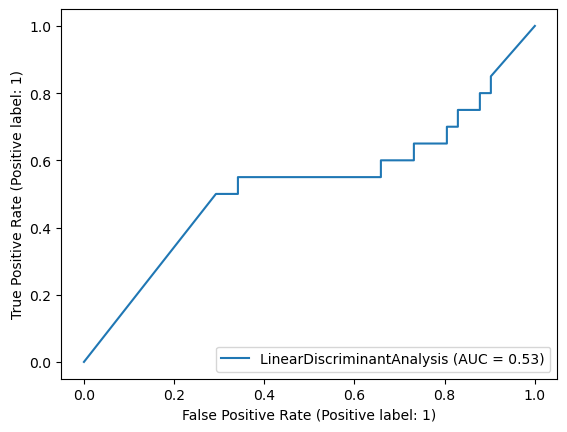

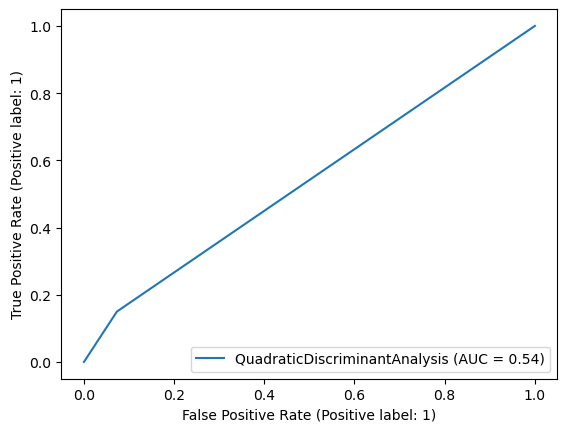

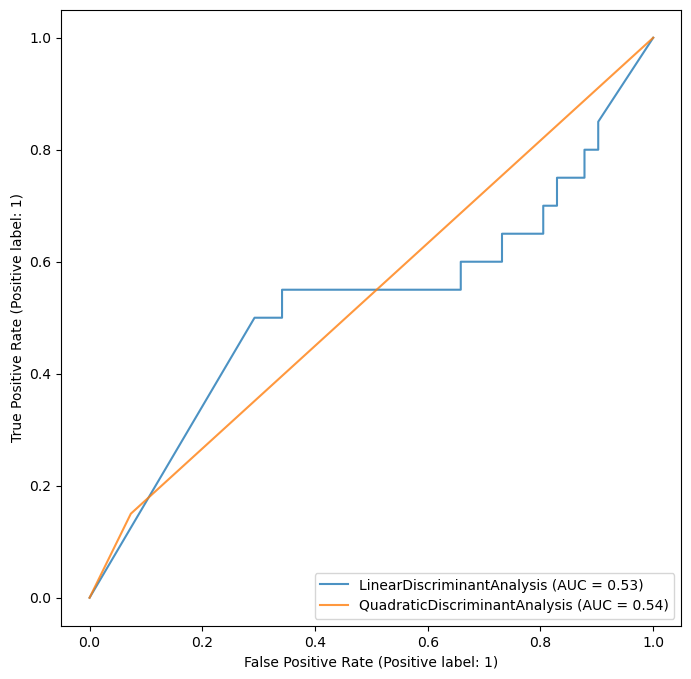

In [130]:
lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()

# Fit the models to the data
lda.fit(evs_train, labels_train)
qda.fit(evs_train, labels_train)

lda_disp = RocCurveDisplay.from_estimator(lda, evs_test, labels_test)
qda_disp = RocCurveDisplay.from_estimator(qda, evs_test, labels_test)

# Plot ROC curves
fig, ax = plt.subplots(figsize=(8, 8))
lda_disp.plot(ax=ax, alpha=0.8)
qda_disp.plot(ax=ax, alpha=0.8)
plt.show()


In [132]:
from sklearn import svm

In [133]:
clf = svm.SVC(kernel='linear')

# Fit the classifier to the training data
clf.fit(evs_train, labels_train)

# Use the trained classifier to make predictions on the test data
y_pred = clf.predict(evs_test)

In [137]:
from sklearn.svm import SVC
from sklearn.metrics import RocCurveDisplay
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

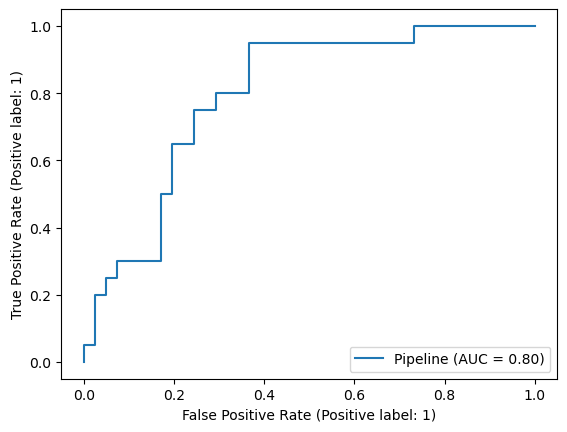

In [140]:
X_train = evs_train
y_train = labels_train
y_test = labels_test
X_test = evs_test
svm_pipeline = make_pipeline(StandardScaler(), SVC(probability=True, random_state=42))

# Fit the pipeline to the trai`ning data
svm_pipeline.fit(X_train, y_train)

# Create a ROC curve display from the pipeline and plot the curve
roc_display = RocCurveDisplay.from_estimator(svm_pipeline, X_test, y_test)

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import roc_auc_score
import pandas as pd
import numpy as np


# Split data into training and test sets with stratified sampling
X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Preprocess categorical features using OneHotEncoder
categorical_features = X.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocess numerical features using StandardScaler
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define KNN model
knn = KNeighborsClassifier()

# Define pipeline to preprocess data and fit model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', knn)
])

# Define hyperparameters to tune
param_grid = {
    'classifier__n_neighbors': np.arange(1, 50, 2)
}

# Define cross-validation scheme based on ROC AUC
cv = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='roc_auc')

# Fit model on training data
cv.fit(X_train, y_train)

# Predict on test data
y_pred = cv.predict(X_test)

# Calculate ROC AUC on test data
roc_auc = roc_auc_score(y_test, y_pred)
print('ROC AUC:', roc_auc)

# Print best hyperparameters and corresponding ROC AUC score
print('Best hyperparameters:', cv.best_params_)
print('ROC AUC with best hyperparameters:', cv.best_score_)
